<h1>Stock market Analysis and Prediction</h1>
<h2> Netanel Elmaliach </h2>

<p><b>Please read the document attached for more information </b></p>


<p>A stock price is known to be impacted by many factors, many of them cannot be predicted, future events,trends, and even the news can determine whether the stock price will increase or decrease.<br>
Alternatively, some factors can give us a sense about the stock future, this are called the <a href = "https://www.investopedia.com/terms/f/fundamentalanalysis.asp" >Fundamental Factors</a> which apply Advanced Fundamental Analysis strategies that will try to evaluate the stock price in the future to come, this technique is mostly used by long term investors.
</p>
<p>In this project,we will answer some of those questions with great depth,for me the stock market was something i was always interested about,but as acomplete newbe it was also very intemidating. but using the tools i learned during the Data Mining course, and by implementeing those tools, my main goal in this project is try and clarify whats a good investment, and get much more comfortable with stock market investments.</p>

<h2>Resources</h2>

<p>For the purpes of getting a valid historical data,which will be continuously update for future Analysis of the  stock market,we will use the 
    <a href = "https://api.tiingo.com/documentation/general/overview">Tiingo api</a>
    <br>
    Tiingo's APIs are built to be performant, consistent, and also support extensive filters, which can save us a lot of time during development, in addition to some useful featurs that we will see later on in the project</p>
<p>There are several reasons why i will be using the tiingo API and not a known stock market data set from kaggle:</p>
<ul> 
<li>Tiingo's EOD Stock Price API gives you the maximum history available for listed tickers, which means for companies that have been around long enough, you are looking at 50+ years of history.</li>
<br>
<li>Tiingo's EOD Stock Price API is always up to date,and keeps updating stocks data on a daily bases, this is a big adventuge over a large Data Set which contains stocks data until a certien year.</li>
<br>
<li>Tiingo's EOD Stock Price API has a lot of diffrent applications, for example the News Api the we will use on part 4, or the Crypto API that i intend to use for future purpeses</li>
<ul>

<h2>Part One - Explore & visualize</h2>
<p>There are approximately 3467 stocks listed under NASDAQ index, which is one of the largest stock exchange market place, obviously we wolud not be able to analyze all of them.</p>
<p>So we will keep track of what is called a portfolio - simply what stocks you possess in total, and how they’re divided.for the purpse of this project, and to make things slitly more "fun", we will keep track on 5 very familiar stocks, owned by companies that we all know.</p>

<ul> 
<li>Apple Inc. (AAPL)</li>
<li>Facebook, Inc. (FB)</li>
<li>Amazon.com, Inc. (AMZN)</li>    
<li>Microsoft Corporation (MSFT)</li>
<li>Nvidia (NVDA)</li>

</ul>

<p>In order to achieve interactive plots, i used<a href = "https://plot.ly/python/"> Plotly</a> and <a href="https://plot.ly/ipython-notebooks/cufflinks/"> Cufflinks</a> Python graphing library which i found very suitable for this project</p>

<h2>dependencies </h2>
<ol> 
    <li> <a href = "https://plot.ly/python/"> Plotly </a>-version 3.0.0 </li> 
    <li> <a href="https://plot.ly/ipython-notebooks/cufflinks/"> Cufflinks </a>-version 0.15 </li>
    <li> <a href="https://facebook.github.io/prophet/docs/quick_start.html"> fbprophet </a> </li>
</ol>

In [76]:
#please run this commands in order to install all necessary dependencies

# !pip install plotly==3.10.0
# !pip install cufflinks==0.15
# !pip install fbprophet

import requests as req
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.plotly import plot,iplot
cf.go_offline()

In [77]:
#a function to format the coming results
def get_stock_data(stock_symbol,start_date,end_date):
    base_url = "https://api.tiingo.com/tiingo/daily/" + stock_symbol + '/prices?'
    api_key = 'your Tiingo api key here'
    payload = {
        'startDate':start_date,
        'endDate':end_date,
        'token':api_key,
        'columns':['date,close,open,low,high,volume']
    }
    
    request = req.get(base_url,params=payload)    
    return request

In [78]:
def convert_to_dataframe(data):
    columns = ['date','close','open','low','high','volume']
    return pd.DataFrame(data = data,columns=columns)

In [79]:
start_date = '2013-1-1'
end_date = '2019-1-6'

MFST = get_stock_data('MSFT',start_date,end_date).json()
MFST = convert_to_dataframe(MFST)

AAPL = get_stock_data('AAPL',start_date,end_date).json()
AAPL = convert_to_dataframe(AAPL)

FB = get_stock_data('FB',start_date,end_date).json()
FB = convert_to_dataframe(FB)

AMZN = get_stock_data('AMZN',start_date,end_date).json()
AMZN = convert_to_dataframe(AMZN)

NVDA = get_stock_data('NVDA',start_date,end_date).json()
NVDA = convert_to_dataframe(NVDA)


Let concat each stock data, to a a large data frame 

In [80]:
Dates = pd.to_datetime(AAPL['date'])
tickers = ['MFST','AAPL','FB','AMZN','NVDA']
bank_stocks = pd.concat([MFST,AAPL,FB,AMZN,NVDA],axis = 1 ,keys = tickers).T.drop_duplicates(keep= False).T
bank_stocks.set_index(Dates,inplace = True)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker                 MFST                                      AAPL  \
Stock Info                 close   open      low   high    volume    close   
date                                                                         
2013-01-02 00:00:00+00:00  27.62  27.25  27.1499  27.73  52899300   549.03   
2013-01-03 00:00:00+00:00  27.25  27.63    27.16  27.65  48294400  542.096   
2013-01-04 00:00:00+00:00  26.74  27.27    26.73  27.34  52521100      527   
2013-01-07 00:00:00+00:00  26.69  26.77    26.64  26.88  37110400    523.9   
2013-01-08 00:00:00+00:00  26.55  26.75    26.46  26.79  44703100   525.31   

Bank Ticker                                                    ...     AMZN  \
Stock Info                    open      low    high    volume  ...    close   
date                                                           ...            
2013-01-02 00:00:00+00:00   553.82   541.63     555  20018500  ...   257.31   
2013-01-03 00:00:00+00:00   547.88      541  549.67  12605900  ...   258.48   
2013-01-04 00:00:00+00:00  536.965  525.829  538.63  21226200  ...   259.15   
2013-01-07 00:00:00+00:00      522    515.2   529.3  17291300  ...  268.459   
2013-01-08 00:00:00+00:00   529.21   521.25  531.89  16382400  ...   266.38   

Bank Ticker                                                      NVDA         \
Stock Info                   open      low     high   volume    close   open   
date                                                                           
2013-01-02 00:00:00+00:00  256.08   253.26    258.1  3271000    12.72  12.56   
2013-01-03 00:00:00+00:00  257.27   256.37   260.88  2750900    12.73  12.72   
2013-01-04 00:00:00+00:00  257.58   256.65    259.8  1874200    13.15  12.75   
2013-01-07 00:00:00+00:00  262.97   262.67  269.725  4910000    12.77  13.14   
2013-01-08 00:00:00+00:00  267.07  263.567   268.98  3010700  12.4915   12.8   

Bank Ticker                                        
Stock Info                   low   high    volume  
date                                               
2013-01-02 00:00:00+00:00  12.51  12.73  11970900  
2013-01-03 00:00:00+00:00  12.58  12.87   7472200  
2013-01-04 00:00:00+00:00  12.71  13.19  13124200  
2013-01-07 00:00:00+00:00  12.68  13.18  15268300  
2013-01-08 00:00:00+00:00   12.4  12.84  11660600  

[5 rows x 25 columns]

Lets see whats the max and min price of each stock

In [81]:
max_price = pd.DataFrame(bank_stocks.xs(key = "close",axis = 1 ,level = "Stock Info").max(),columns=['max price'])
min_price = pd.DataFrame(bank_stocks.xs(key = "close",axis = 1 ,level = "Stock Info").min(),columns=['min price'])
mean_price = pd.DataFrame(bank_stocks.xs(key = "close",axis = 1 ,level = "Stock Info").mean(),columns=['mean price'])
pd.concat([min_price,max_price,mean_price],axis =1)

,min price,max price,mean price
Bank Ticker,,,
MFST,26.460,115.61,58.368320
AAPL,90.280,647.35,221.972698
FB,22.899,217.50,106.337074
AMZN,248.230,2039.51,737.192131
NVDA,11.980,289.36,82.021551


** Lets see the close prices on these stocks, and get a vizualizaion ** 

In [82]:
df_close = pd.DataFrame()
for tick in tickers:
    df_close[tick + ' Close'] = bank_stocks[tick]["close"]

df_close.iplot(xTitle = 'Years',yTitle = 'Closing price',title = 'Stocks Info')

From the cell above we can see how the amazon stock price has increased over the years, but take a look at  AAPL(apple) stock betwwen the years 2014,2015 looks like a magor hit, lets try to understand why?

In [83]:
apple_decrease = bank_stocks['AAPL'].loc["2014-1-1":"2014-12-31"]
apple_decrease['month'] = apple_decrease.index
min_price = apple_decrease['close'].min()
max_price = apple_decrease['close'].max()
loss_percentage = int((min_price/max_price) *100)
apple_decrease['month'] = apple_decrease['month'].apply(lambda x : x.month)
apple_decrease.iplot(title = 'AAPL - 2014',xTitle = 'Monthes',yTitle = 'Volume')

<p>Notice how the price of the share did went down, but the Volume has gone up? Looks like on june 2014, there was a <a href = "https://www.investopedia.com/terms/s/stocksplit.asp" > Stock Split </a> <br> AAPL's split took place on June 09, 2014. This was a 7 for 1 split, meaning for each share of AAPL owned pre-split, the shareholder now owned 7 shares. For example, a 8000 share position pre-split, became a 56000 share position following the split.</p>


<p>Appernently, on sep 9 2014,Apple  <a href = "https://thenextweb.com/apple/2014/09/09/everything-apple-announced-september-2014-keynote/">  announced some new products </a>, which can explaine the high increase in volume that month</p>

<h2>Returns</h2>

A return is a percentage that tells you how much an investment has increased in value on average per year or over a period of time. <br> 
return is a good way to evaluate how successful an investment has been, or to compare the returns of two investments you've held over different time frames on equal footing.<br>
Lets create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$
<br>
We can use pandas pct_change() method on the Close column to create a column representing this return value. 

In [84]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick + " returns"] = bank_stocks[tick]["close"].pct_change()
    
returns = returns.iloc[1:]
returns.head()

,MFST returns,AAPL returns,FB returns,AMZN returns,NVDA returns
date,,,,,
2013-01-03 00:00:00+00:00,-0.013396,-0.012630,-0.008214,0.004547,0.000786
2013-01-04 00:00:00+00:00,-0.018716,-0.027847,0.035650,0.002592,0.032993
2013-01-07 00:00:00+00:00,-0.001870,-0.005882,0.022994,0.035922,-0.028897
2013-01-08 00:00:00+00:00,-0.005245,0.002691,-0.012256,-0.007745,-0.021809
2013-01-09 00:00:00+00:00,0.005650,-0.015629,0.052624,-0.000113,-0.022535


As you can see, because the returns is always take into account the previous close price, the first row cannot be calculated, so lets drop it

In [85]:
returns.describe()

,MFST returns,AAPL returns,FB returns,AMZN returns,NVDA returns
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,0.000974,-0.000029,0.001271,0.001382,0.001850
std,0.014831,0.027092,0.020972,0.019158,0.023902
min,-0.113995,-0.854857,-0.189609,-0.109972,-0.187559
25%,-0.005993,-0.006743,-0.008343,-0.007398,-0.008427
50%,0.000651,0.000440,0.001085,0.001121,0.001455
75%,0.007923,0.008849,0.011214,0.010996,0.012213
max,0.104522,0.081982,0.296077,0.141311,0.298067


In [86]:
min_dates = pd.DataFrame(returns.idxmin(),columns=['min returns'])
max_dates = pd.DataFrame(returns.idxmax(),columns=['max returns'])
std_total = pd.DataFrame(returns.std(),columns=['std_total'])
std_2015 = pd.DataFrame(returns.loc["2015-01-01":"2015-12-12"].std(),columns=['std_2015'])
pd.concat([min_dates,max_dates,std_total,std_2015],axis =1)

,min returns,max returns,std_total,std_2015
MFST returns,2013-07-19 00:00:00+00:00,2015-04-24 00:00:00+00:00,0.014831,0.018024
AAPL returns,2014-06-09 00:00:00+00:00,2014-04-24 00:00:00+00:00,0.027092,0.016934
FB returns,2018-07-26 00:00:00+00:00,2013-07-25 00:00:00+00:00,0.020972,0.016328
AMZN returns,2014-01-31 00:00:00+00:00,2015-04-24 00:00:00+00:00,0.019158,0.021433
NVDA returns,2018-11-16 00:00:00+00:00,2016-11-11 00:00:00+00:00,0.023902,0.022147


From the cell above we can classify the riskiest for the year 2015 to be AAPL, and FB, with 0.016
and the least riskiest to be AMZN, and NVDA with 0.02 

Lets explore, and find out what are the most corrolated stocks at the year of 2015

In [87]:
returns.loc["2015-01-01":"2015-12-12"].corr().iplot(kind = 'bar',title = 'Returns correlations - 2015',xTitle = 'Stocks')

<h2>Moving Average</h2>
<p> <a href = "https://en.wikipedia.org/wiki/Moving_average">The moving average </a> (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks or any time period the trader chooses. There are advantages to using a moving average in trading, as well as options on what type of moving average to use. </p>

In [88]:
def moving_average(df,stock_name,start_date,end_date):
    df_tick = pd.DataFrame()
    df_tick['close'] = df['close'].loc[start_date:end_date]
    df_tick['mvg'] = df['close'].loc[start_date:end_date].rolling(window = 30).mean()
    year_start = start_date.split('-')[0]
    year_end = end_date.split('-')[0]
    df_tick.iplot(title = f'{stock_name} Moving Average from {year_start} to {year_end}',
                 xTitle = 'Years',yTitle = 'Close')
     

moving_average(bank_stocks['MFST'],'MFST',"2018-01-01","2019-01-01")
moving_average(bank_stocks['FB'],'FB',"2017-01-01","2019-01-01")
moving_average(bank_stocks['AMZN'],'AMZN',"2015-01-01","2019-01-01")

In [89]:
bank_stocks.xs(key = "close",axis =1,level = "Stock Info").astype(float).corr().iplot(kind = 'heatmap',colorscale = 'blues',values= True)

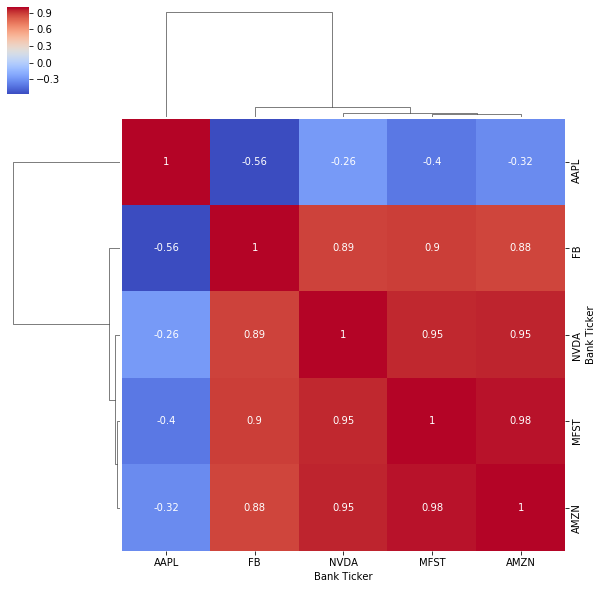

In [90]:
sns.clustermap(bank_stocks.xs(key = "close",axis=1,level = "Stock Info").astype(float).corr(),annot = True,cmap = 'coolwarm')

because all of the companies in our protfolyo are tech company, they are strongly related to one another, and we can see the heatmap, and the clusterheat map present a very strong corrolation between them, up to .98% between MFST and AMZN

<h1>Part 2 - Machine Learning</h1>

<h2>Linear Regression</h2>

In [91]:
#Linear Regression model 

#First, we will define a DataFrame that will include the real closed prices of the AMZN stock
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

df_lm = bank_stocks['AMZN'][['close']]

forecasted_window = int(30)

##then we will add a new column to this datadrame called 'Prediction', and label column with data shifted 30 units up
df_lm['Prediction'] = df_lm['close'].shift(-forecasted_window) 
X = np.array(df_lm.drop(['Prediction'], 1)).astype(float)
X = preprocessing.scale(X)

#We’ll set a new input variable to these days and remove them from the X array.
X_forecast = X[-forecasted_window:] # set X_forecast equal to last 30
X = X[:-forecasted_window] # remove last 30 from X
y = np.array(df_lm['Prediction'])
y = y[:-forecasted_window]


# Training
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
forecast_prediction = clf.predict(X_forecast)
print("confidence: ", confidence)

confidence:  0.965730559734974


In [92]:
#ploting the real values vs our prediction valus
real_results = df_lm['close'][-forecasted_window:]
real_results = pd.DataFrame(real_results,columns=['close']).reset_index(level=[0])
predictions_result = pd.DataFrame(forecast_prediction,columns=['Prediction'])
expected_results = pd.concat([real_results,predictions_result],axis = 1)
expected_results.iplot(x = "date",title = "AMZN - Linear Regression Model",xTitle = "Dates",yTitle = "Price")

#Evaluate results
r_square = r2_score(expected_results['close'],expected_results['Prediction'])
mean_squere = mean_squared_error(expected_results['close'],expected_results['Prediction'])
mean_absolute = mean_absolute_error(expected_results['close'],expected_results['Prediction']) 
print("Evaluate results")
print(f'R-Square : {r_square}')
print(f'mean square : {mean_squere}')
print(f'mean absolute: {mean_absolute}')

Evaluate results
R-Square : 0.8667840429878337
mean square : 1317.21307854268
mean absolute: 36.276305382010605


<h2>Prophet: Automatic Forecasting Procedure</h2>

<p> <a href = "https://facebook.github.io/prophet/"> prophet </a> is an open source released by Facebook in order to provide some useful guidance for producing forecast at scale. By default, it would divide a time series into trend and seasonality, which might contain yearly, weekly and daily. However, analysts can define their own seasonality. To get better understanding about the package, the <a href = "https://github.com/facebook/prophet"> document </a>from Prophet is really helpful.

In [93]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py

#Prophet prediction
aapl_df = pd.DataFrame(bank_stocks['AAPL']['close']).reset_index()
aapl_df.rename(columns = {'date':'ds', 'close' : 'y'},inplace = True)
aapl_df['ds'] = aapl_df['ds'].dt.date
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(aapl_df)
futere_aapl = prophet_model.make_future_dataframe(periods = 365)
forecast = prophet_model.predict(futere_aapl)
fig = plot_plotly(prophet_model, forecast,xlabel = 'Years',ylabel = "Predictions")  # This returns a plotly Figure
py.iplot(fig)

#Evaluate results
r_square = r2_score(aapl_df['y'],forecast['yhat'][:-365])
mean_squere = mean_squared_error(aapl_df['y'],forecast['yhat'][:-365])
mean_absolute = mean_absolute_error(aapl_df['y'],forecast['yhat'][:-365]) 
print("Evaluate results")
print(f'R-Square : {r_square}')
print(f'mean square : {mean_squere}')
print(f'mean absolute: {mean_absolute}')

/Users/natielmaliach/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



Evaluate results
R-Square : 0.9232354738027917
mean square : 1940.3218908083766
mean absolute: 25.352323643631866


<h2> interpretation </h2>
<p>The power of Prophet is to recognize trends, and its looks like Prophet recognize the trend quite well, especially during the year 2014, where apple stock had a magor fall-back due to the split we mentioned earlyer. </p>

<h2>Long Short Term Memory (LSTM)</h2>
<p>LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not.here is a great source to read - <a href = "http://colah.github.io/posts/2015-08-Understanding-LSTMs/">Understanding LSTM Networks</a> if you want to get a better understanding about LSTM and how it works behind the scenes.</p>

In [94]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

AMZN_df = bank_stocks['AMZN']['close']
AMZN_df = pd.DataFrame(AMZN_df).astype(float)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(AMZN_df)

#set test data
train_length = int(len(scaled_data) *0.7)
test_length = len(scaled_data) - train_length
#set the training data to be 70%
train_data = scaled_data[:train_length,:]
#set the testing data to be  
test_data = scaled_data[train_length:,:]

#timestep - how many units back in time you want your network to see
def create_dataset(dataset,timestep):
    data_x ,data_y = [],[]
    for i in range(len(dataset) - timestep -1):
        data_x.append(dataset[i:(i+timestep),0])
        data_y.append(dataset[i + timestep,0])
    return np.array(data_x),np.array(data_y)

timestep = 1
train_x,train_y = create_dataset(train_data,timestep)
test_x,test_y = create_dataset(test_data,timestep)

#reshape to fit the model better
train_x = np.reshape(train_x,(train_x.shape[0],1,train_x.shape[1]))
test_x = np.reshape(test_x,(test_x.shape[0],1,test_x.shape[1]))

In [95]:
#build and train the model

model = Sequential()
#256 Nodes
model.add(LSTM(256,input_shape = (1,1)))

#adding another layer 
#activation = Activation function to use.
#sigmoid explanation - https://en.wikipedia.org/wiki/Sigmoid_function
model.add(Dense(1,activation = "sigmoid"))

#optimizer = "adam" explanation- https://arxiv.org/abs/1412.6980v8
model.compile(loss="mean_squared_error",optimizer = 'adam',metrics = ['accuracy'])
print(model.summary())

model.fit(train_x,train_y,epochs=1,batch_size=1,verbose=1)
score = model.evaluate(test_x,test_y,verbose=0)
print('Kears model loss = ',score[0])
print('Kears model accuracy = ',score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None
1057/1057 [==============================] - 15s 14ms/sample - loss: 0.0140 - acc: 9.4607e-04
Kears model loss =  0.00161487622128849
Kears model accuracy =  0.0022123894


**Notice how the model accuracy is deceiving with a very low accuracy rate, this is actually due to the miss-match between each real-price and prediction price.**

In [96]:
# run the predict function
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

#transforming the scaled data to original values
train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform([train_y])

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

#set the sane shape metrics
train_predict_plot = np.empty_like(scaled_data)
test_predict_plot = np.empty_like(scaled_data)

#set all values to nan
train_predict_plot[:,:] = np.nan
test_predict_plot[:,:] = np.nan

train_predict_plot[1:len(train_predictions) + 1 ,:] = train_predictions
test_predict_plot[len(train_predictions) + 3: len(scaled_data)-1,:] = test_predictions

In [97]:
#plot the results

#convert to df
real_results = pd.DataFrame(scaler.inverse_transform(scaled_data))
train_predict_plot = pd.DataFrame(train_predict_plot)
test_predict_plot = pd.DataFrame(test_predict_plot)

#format df
final_results = pd.concat([real_results,train_predict_plot,test_predict_plot],axis=1)
final_results.set_index(AMZN_df.index,inplace = True)
final_results.columns= ["Real_Close","Train_prediction","Test_prediction"]

#plot results
final_results.iplot(xTitle='Years',yTitle='Price',title = "LSTM | AMZN stock")

#Evaluate results - only on the test data

evaluate = final_results[['Real_Close','Test_prediction']].dropna().reset_index()
r_square = r2_score(evaluate['Real_Close'],evaluate['Test_prediction'])
mean_squere = mean_squared_error(evaluate['Real_Close'],evaluate['Test_prediction'])
mean_absolute = mean_absolute_error(evaluate['Real_Close'],evaluate['Test_prediction']) 
print("Evaluate results")
print(f'R-Square : {r_square}')
print(f'mean square : {mean_squere}')
print(f'mean absolute: {mean_absolute}')

Evaluate results
R-Square : 0.9584555943825411
mean square : 5181.6250177816255
mean absolute: 57.2945139441026


<h2>Conclusions</h2>
<p>Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction – physical factors vs. physhological, rational and irrational behaviour, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy.</p>

<p>Predict the stock market with 100% accuracy is virtually impossible, however using diffrent machine learning algorithems can realy help us understand market trends, and for a long-time investor it can help lower the risk</p>